<a href="https://colab.research.google.com/github/ksantana3/Frequency_Analysis/blob/master/Dr_Jekyll_vs_Mr_Hyde_Word_Frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dr. Jekyll vs Mr. Hyde an Analysis of Word Frequency

While watching Thor: Ragnorak I noticed that Hulk received a large portion of screen time compared to Dr Banner.  That led me to thinking about the inspiration book  Dr. Jekyll and Mr. Hyde of which the Hulk was partially based off of.  Which led me to the question "Who was mentioned more in the book Dr. Jekyll or Mr. Hyde" which I will attempt to answer below.

In [0]:
# Importing requests, BeautifulSoup and nltk
import requests
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

First, I acquired the book which is available to be read online at Project Gutenberg and titled 'The Strange Case Of Dr. Jekyll And Mr. Hyde' , by Robert Louis Stevenson

In [0]:
# Requesting The Strange Case Of Dr. Jekyll And Mr. Hyde in HTML 
r = requests.get('http://www.gutenberg.org/files/43/43-h/43-h.htm')

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

# Printing the first 1000 characters of html file
print(html[0:999])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Strange Case Of Dr. Jekyll And Mr. Hyde, by Robert Louis Stevenson</title>

<style type="text/css">


body { margin-left: 20%;
       margin-right: 20%;
       text-align: justify }

p {text-indent: 1em;
   margin-top: 0.25em;
   margin-bottom: 0.25em; }

h1, h2, h3, h4, h5, h6 {text-align: center; font-style: normal;
font-weight: normal; line-height: 1.5; margin-top: .5em; margin-bottom:
.5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 175%;}
h3 {font-size: 150%;}
h4 {font-size: 120%;}
h5 {font-size: 110%;}

p.rig


In [0]:

# Creating a soup object from the HTML and retrieving the text from the soup object.
soup = BeautifulSoup(html, 'html.parser')
text = soup.get_text()


I will now tokenize the text in which I will break it up into many small pieces and get rid of the white spaces.

In [0]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text)

# Printing out the first 10 words / tokens 
print(tokens[:10])

['The', 'Strange', 'Case', 'Of', 'Dr', 'Jekyll', 'And', 'Mr', 'Hyde', 'by']


In order to match the words more accurately I will convert all the text to lowercase values.

In [0]:
# A new list to hold the lowercased words
words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

# Verifying lowercase conversion
print(words[:10])

['the', 'strange', 'case', 'of', 'dr', 'jekyll', 'and', 'mr', 'hyde', 'by']


Words that don't really carry a "value" and tend to be the most common words of the language are called stop words.  

In [0]:
# Importing English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

# Printing out the first 10 stop words
print(sw[:10])
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'oth

In [0]:
# A new list to hold the text with No Stop words
words_ns = []

# Appending to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Verifying that the stop words are gone
print(words_ns[:10])

['strange', 'case', 'dr', 'jekyll', 'mr', 'hyde', 'robert', 'louis', 'stevenson', 'body']


I will now plot the words_ns using a frequency distribution chart see if Dr. Jekyll and Mr. Hyde are among the most used words.

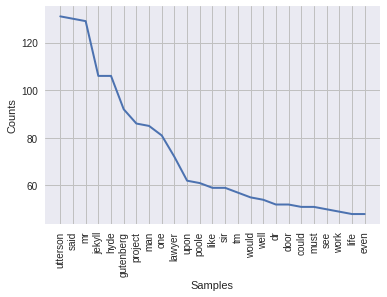

In [0]:
# This command display figures inline
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution
freqdist.plot(25)

 Who was mentioned more in the book Dr. Jekyll or Mr. Hyde?
 
It appears that Dr Jekyll and Mr Hyde tied for numbers of mentions in the book at 105.  This was a suprise for me as I was expecting a clear winner.  I verified this within the book to make sure that there was separation between the two names throughout the book and found a noticable separation.